### Import your data into a Pandas DataFrame.

### Merge your DataFrames.

### Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.

### Determine the mean, median, and mode for the following:

    #### The total number of rides for each city type.

    #### The average fares for each city type.

    #### The total number of drivers for each city type.

### Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:

    #### The number of rides for each city type.

    #### The fares for each city type.

    #### The number of drivers for each city type.

### Create a pie chart that visualizes each of the following data for each city type:

    #### The percent of total fares.

    #### The percent of total rides.

    #### The percent of total drivers.


In [2]:
%matplotlib inline

In [3]:
#Import your data into a Pandas DataFrame and add dependincies
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np

city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [4]:
#Actually Reading in the csv files
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [6]:

city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [11]:
sum(city_data_df["type"]=="Suburban")

36

In [12]:
sum(city_data_df['type']=='Rural')

18

In [13]:
ride_data_df.count()


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
#Merge cells only related column is city and ride data has more rows so I should be adding city data to ride data
#Database to the rescue merge left is similar to left join in SQL

#https://stackoverflow.com/questions/27556377/pandas-combine-data-frames-of-different-sizes

pyber_data_df = ride_data_df.merge(city_data_df, on='city', how='left').copy()
pyber_data_df.head()

#or I could've just followed along
#new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"], how='left')


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [18]:
pyber_data_df.isnull().sum()

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

## The two following cells were my attempt without following the directions

In [ ]:
#Create a bubble chart that showcases the average fare versus the total number of rides 
#with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
#Group by city type and then by city to get get 
# number of drivers per city is already stored in city_data_df

#GroupedData1_obj = pyber_data_df.groupby(['type', 'city'])

#GroupedData1_df = GroupedData1_obj['fare'].mean()
#copy1_df = GroupedData1_df.reset_index()

#GroupedData2_df = GroupedData1_obj['ride_id'].count()
#copy2_df = GroupedData2_df.reset_index()

#GroupedData3_df = GroupedData1_obj['driver_count'].first()
#copy3_df = GroupedData3_df.reset_index()

#new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"], how='left')

#BigGroup_df = pd.merge(pd.merge(copy1_df, copy2_df, left_on=['type', 'city'], right_on=['type', 'city'], how='left'), copy3_df, left_on=['type', 'city'], right_on=['type', 'city'], how='left')
#BigGroup_df.head()

In [ ]:
#plt.scatter(BigGroup_df.loc[BigGroup_df['type']=='Rural','ride_id'],
#                    BigGroup_df.loc[BigGroup_df['type']=='Rural','fare'],
#                    label = 'Rural',
#                    s=[BigGroup_df.loc[BigGroup_df['type']=='Rural','driver_count']], 
#                    color='yellow', marker = 'o', edgecolor = 'black')
#plt.scatter(BigGroup_df.loc[BigGroup_df['type']=='Urban','ride_id'],
#                    BigGroup_df.loc[BigGroup_df['type']=='Urban','fare'],
#                    label = 'Urban',
#                    s=[BigGroup_df.loc[BigGroup_df['type']=='Urban','driver_count']],
#                    color = 'red', marker = 'o', edgecolor = 'black')
#plt.scatter(BigGroup_df.loc[BigGroup_df['type']=='Suburban','ride_id'],
#                    BigGroup_df.loc[BigGroup_df['type']=='Suburban','fare'],
#                    label = 'Suburban',
#                    s=[BigGroup_df.loc[BigGroup_df['type']=='Suburban','driver_count']],
#                    color = 'blue', marker = 'o', edgecolor = 'black')

#plt.legend()
#plt.grid()
#plt.show()


## Back to following directions

In [19]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [25]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [32]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
#urban_ride_count.head()

In [33]:
# Get the number of rides for Suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
#suburban_ride_count.head()

In [34]:
# Get the number of rides for Rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
#rural_ride_count.head()

In [35]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
#urban_avg_fare.head()

In [36]:
# Get average fare for each city in the suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
#suburban_avg_fare.head()

In [37]:
# Get average fare for each city in the urban cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
#rural_avg_fare.head()

In [38]:
# Get the average number of drivers for each city type.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

<function matplotlib.pyplot.legend(*args, **kwargs)>

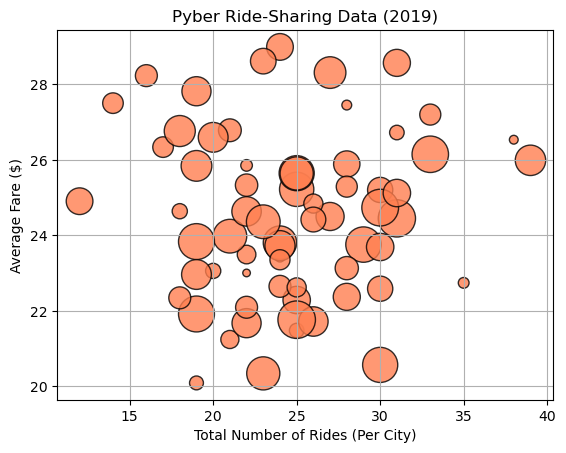

In [53]:
# Build the scatter plots for all cities.
plt.scatter(urban_ride_count, urban_avg_fare, label='Urban', 
            s=10*urban_driver_count, color = 'coral', edgecolor = 'black',
            linewidths=1, alpha = .8)

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride-Sharing Data (2019)')
plt.grid(True)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

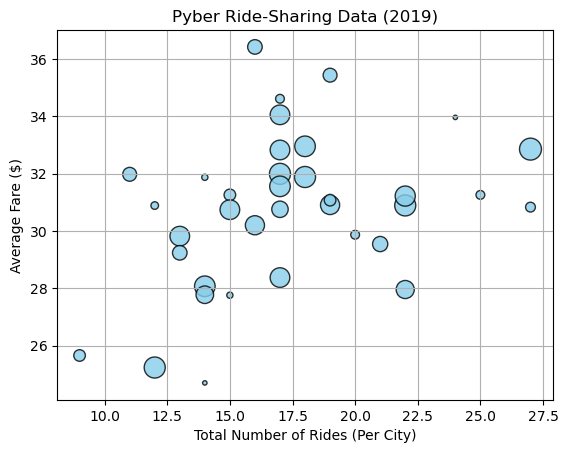

In [54]:
plt.scatter(suburban_ride_count, suburban_avg_fare, label='Suburban', 
            s=10*suburban_driver_count, color = 'skyblue', edgecolor = 'black',
            linewidths=1, alpha = .8)

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride-Sharing Data (2019)')
plt.grid(True)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

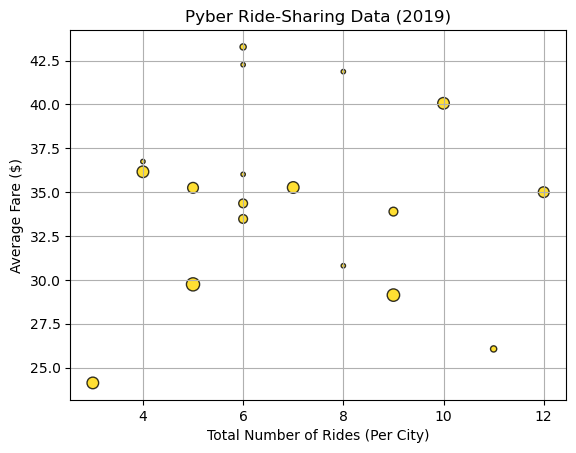

In [55]:
plt.scatter(rural_ride_count, rural_avg_fare, label='Rural', 
            s=10*rural_driver_count, color = 'gold', edgecolor = 'black',
            linewidths=1, alpha = .8)

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride-Sharing Data (2019)')
plt.grid(True)
plt.legend

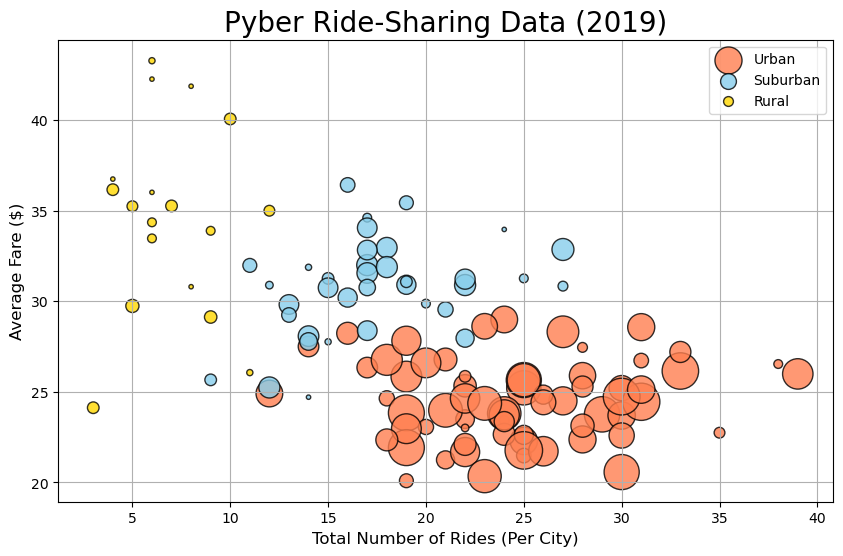

In [56]:
#now plot all together
plt.figure(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, label='Urban', 
            s=10*urban_driver_count, color = 'coral', edgecolor = 'black',
            linewidths=1, alpha = .8)

plt.scatter(suburban_ride_count, suburban_avg_fare, label='Suburban', 
            s=10*suburban_driver_count, color = 'skyblue', edgecolor = 'black',
            linewidths=1, alpha = .8)

plt.scatter(rural_ride_count, rural_avg_fare, label='Rural', 
            s=10*rural_driver_count, color = 'gold', edgecolor = 'black',
            linewidths=1, alpha = .8)

plt.xlabel('Total Number of Rides (Per City)', fontsize = 12)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.title('Pyber Ride-Sharing Data (2019)', fontsize = 20)
plt.grid(True)

plt.legend()

plt.show()

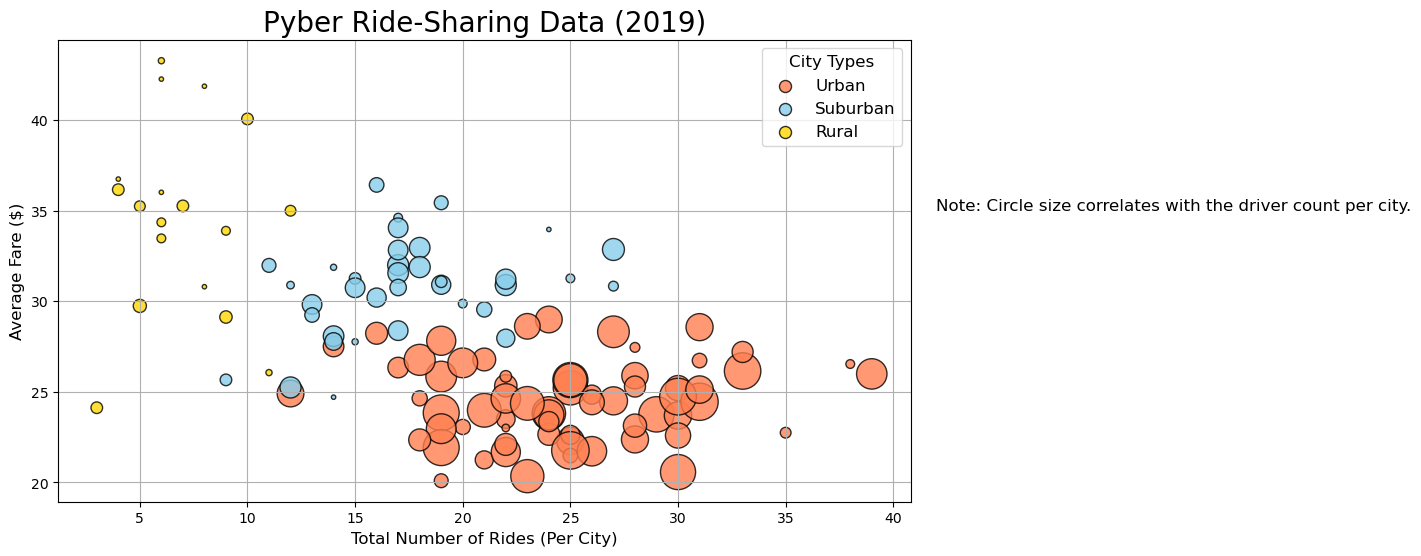

In [67]:
plt.figure(figsize=(11,6))
plt.scatter(urban_ride_count, urban_avg_fare, label='Urban', 
            s=10*urban_driver_count, color = 'coral', edgecolor = 'black',
            linewidths=1, alpha = .8)

plt.scatter(suburban_ride_count, suburban_avg_fare, label='Suburban', 
            s=10*suburban_driver_count, color = 'skyblue', edgecolor = 'black',
            linewidths=1, alpha = .8)

plt.scatter(rural_ride_count, rural_avg_fare, label='Rural', 
            s=10*rural_driver_count, color = 'gold', edgecolor = 'black',
            linewidths=1, alpha = .8)

plt.xlabel('Total Number of Rides (Per City)', fontsize = 12)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.title('Pyber Ride-Sharing Data (2019)', fontsize = 20)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Adding Note for size correlation, notice atht fontsize here uses a string.
#I've left it as a string to highlight that it can be done this was but a number works fine too
plt.text(42, 35, 'Note: Circle size correlates with the driver count per city.', fontsize = '12', wrap=True)

#save the image
plt.savefig('analysis/Fig1.png')
#plt.show()